# Algoritmia
## Práctica Obligatoria 2
### Curso 2022 - 2023
###### Métodos Divide y Vencerás
---
 

#### Autores:
* Alvar San Martin
* <>

---
Resuelva la siguiente práctica.


**Recuerda**: 
* Solamente puedes utilizar librerías nativas (https://docs.python.org/es/3.7/library/index.html).
  * <sub><sup>_Importe las librerías que desees._</sup></sub>
* Se recomienda utilizar un entorno con la versión 3.7 (`conda create -n <nombre_entorno> python=3.7`). Más información en https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html.
* Las funciones que importes no son "gratis", cada una tendrá una complejidad temporal y espacial que se tendrá que tener en cuenta.
* Las funciones que crees, han de estar en una celda que comience por `#testeable` para que se importe en los test.

**Entrega**
* Poner el nombre del fichero como: `<apellidosPrimerAlumno>_<apellidosSegundoAlumno>_dyv.ipynb`.
    * <sub><sup>_En caso de que el fichero no tenga ese nombre, la entrega tendrá una penalización de **2 puntos**_></sup></sub>
* Verificar que la entrega no está corrupta.
    * <sub><sup>_En caso de que la entrega está corrupta, se evaluará con **0 puntos**_.</sup></sub>
* Ambos alumnos tendrán que hacer la entrega.
    * <sub><sup>_En caso de que uno no la haga se evaluará como **No presentado**, si las entregas son diferentes tendrá cada una una penalización de **2 puntos**_ y se corregirán por separado.</sup></sub>


In [1]:
#testeable
import math
# Imports útiles
from collections import Counter
import random



In [2]:
# No son nativas, pero se usan solo para visualizaciones
import numpy as np
import matplotlib.pyplot as plt
import timeit

plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
#testeable
# Versión ligeramente modificada de la práctica anterior que incluye
# un campo entero id que identifica el tipo de Sopa
class Sopa:
    """
    Clase Sopa. 
    Representa una sopa o caldo.
    """

    def __init__(self, nombre, coste, id):
        """Crea un objeto de clase Sopa

        Parameters
        ----------
        nombre : str
            Nombre de la sopa
        coste : number
            Coste de hacer una olla de sopa
        """
        self.nombre = nombre
        self.coste = coste
        self.id = id

    def __hash__(self):
        """Genera el valor hash identificativo de la sopa

        Returns
        -------
        int
            Valor hash
        """
        return hash(self.id)

    def __str__(self):
        """Genera una cadena descriptiva del objeto

        Returns
        -------
        str
            Cadena descriptiva
        """
        return (f"[Sopa({self.id}): {self.nombre}@{self.coste}€]")
        #return f"[{self.id}]"

    def __repr__(self):
        """Genera una cadena descriptiva del objeto dentro de colecciones

        Returns
        -------
        str
            Cadena descriptiva
        """
        return (f"Sopa({self.id})[{self.nombre}@{self.coste}€]")
        #return f"[{self.id}]"

    """Funciones del profesor"""
    def __eq__(self, obj):
        return self.nombre == obj.nombre and self.id == obj.id
    
    def __lt__(self, obj):
        return self.id < obj.id
    
    def __le__(self, obj):
        return self.id <= obj.id
    
    def __neg__(self):
        self.id = self.id * -1
        return self

In [4]:
#testeable
def key_sort_heapsort(seq, key_function=lambda x:x, reverse=False):
    """Ordena ascendentemente una secuencia utilizando una función clave.
    Usado como base para comparar el resto de algoritmos
    Parameters
    ----------
    seq : sequence
        Secuencia a ordenar, por ejemplo una lista
    key_function : int
        Función que devuelve para los elementos de la secuencia un valor
        clave para la ordenación
    reverse: boolean
        Si es True Invierte el orden de la ordenación.

    Notes
    -----
    No tiene retorno. Ordena en el sitio la secuencia de entrada.
    """

    def heapin(lista, heapsize, pos_elem):
        minimo = pos_elem
        izq = 2 * pos_elem + 1  # hijo izq
        der = 2 * pos_elem + 2  # hijo der

        # Si el hijo izq es menor que el padre
        if izq < heapsize and key_function(lista[izq]) > key_function(lista[pos_elem]):
            minimo = izq

        # Si el hijo der es menor que el padre o el anterior minimo
        if der < heapsize and key_function(lista[der]) > key_function(lista[minimo]):
            minimo = der

        # si ha habido un cambio se cambian de posicion
        # cambia (padre, minimo) a (minimo, padre)
        if minimo != pos_elem:
            (lista[pos_elem], lista[minimo]) = (lista[minimo], lista[pos_elem])
            # Llamada recursiva con el nuevo minimo
            heapin(lista, heapsize, minimo)

    longitud = len(seq)

    # Desde el primer elemto al ultimo padre (longitud/2 -1)
    for elemento in range(longitud // 2 - 1):
        heapin(seq, longitud, elemento)

    # Extraccion de elementos
    for i in range(longitud - 1, 0, -1):
        (seq[i], seq[0]) = (seq[0], seq[i])  # swap
        heapin(seq, i, 0)

In [5]:
#testeable
def key_sort_ultimo(seq, key_function=lambda x: x, reverse=False):
    """Ordena ascendentemente una secuencia utilizando una función clave.
        Usa Quicksort teniendo como pivote siempore el uktimo elemento de la lista
        No es eficiente
    Parameters
    ----------
    seq : sequence
        Secuencia a ordenar, por ejemplo una lista
    key_function : int
        Función que devuelve para los elementos de la secuencia un valor
        clave para la ordenación
    reverse: boolean
        Si es True Invierte el orden de la ordenación.

    Notes
    -----
    No tiene retorno. Ordena en el sitio la secuencia de entrada.
    """
    def quicksort(seq, inicio, fin, reverse):
        '''
        Ordenacion para las sublistas
        '''
        # Caso fin de recursividad
        if inicio >= fin:
            return

        # El pivote es el resultado de ordenar otra sublista
        i_pivote = particion(seq, inicio, fin, reverse)

        # listas de la izq y der
        quicksort(seq, inicio, i_pivote - 1, reverse)
        quicksort(seq, i_pivote + 1, fin, reverse)

    def comparacion(a, b, reverse):
        return a > b if reverse else a < b

    def particion(seq, inicio, fin, reverse):
        '''
        Situa el pivote
        '''
        # print("**************************************")
        # print("Particion de lista: ", seq[inicio:fin])
        # Se comienza al final (CAMBIABLE)
        piv = seq[fin]  # Valor pivote
        piv_i = inicio - 1  # Indice del pivote

        for i in range(inicio, fin):
            # print(f"piv: {piv}, i_piv: {piv_i}, i: {i}-{seq[i]}")
            if comparacion(key_function(seq[i]), key_function(piv), reverse)\
                    or key_function(seq[i]) == key_function(piv):
                piv_i += 1
                (seq[piv_i], seq[i]) = (seq[i], seq[piv_i])
                # print("Incremento de pivote_i")

        (seq[piv_i + 1], seq[fin]) = (seq[fin], seq[piv_i + 1])
        # print("Pivote: ", seq[piv_i+1], " indice ", piv_i+1)
        # hacemos un incremento de mas
        return piv_i + 1

    quicksort(seq, 0, len(seq)-1, reverse)


In [6]:
#testeable
def key_sort(seq, key_function=lambda x: x, reverse=False):
    """
    Ordena ascendentemente una secuencia utilizando una función clave.
    Usa quicksort con pivotaje basado en el intermedio de 3 valores,
    nunca se produce el peor caso
    Parameters
    ----------
    seq : sequence
        Secuencia a ordenar, por ejemplo una lista
    key_function : int
        Función que devuelve para los elementos de la secuencia un valor
        clave para la ordenación
    reverse: boolean
        Si es True Invierte el orden de la ordenación.

    Notes
    -----
    No tiene retorno. Ordena en el sitio la secuencia de entrada.
    """

    def orden_pequenos(arr_p, reverse):
        """
        Por la implementacion que se hace de los pivotes es problematico llegar
        a listas menores de 3 elementos porque no es eficiente obtener pivotes y realizar todo el proceso
        por eso se van a ordenar por otro metodo,
        mas simple que ordena en n operaciones (solo es posible en listas de maximo 
        2 elementos)
        O(1)
        """
        
        if len(arr_p) == 2:
            x, y = key_function(arr_p[0]), key_function(arr_p[1])
            
            if x > y and not reverse:
                arr_p[0], arr_p[1] = arr_p[1], arr_p[0]
            elif reverse and x < y:
                arr_p[0], arr_p[1] = arr_p[1], arr_p[0]
        return arr_p

    def intermedio(arr):
        """
        Obtiene el valor intermedio de una lista de 3 valores
        solo funciona para listas de exactamente 3 valores
        O(1)
        """
        # print("Busqueda de pivote",arr)
        arr = [key_function(i) for i in arr]
        if arr[0] <= arr[1] <= arr[2] or arr[2] <= arr[1] <= arr[0]:
            return 1
        elif arr[1] <= arr[0] <= arr[2] or arr[2] <= arr[0] <= arr[1]:
            return 0
        else:
            return 2

    def comparacion(a, b, reverse):
        return a > b if reverse else a < b

    def quicksort(seq):
        '''
        Situa el pivote
        '''
        if len(seq) < 3:
            #print("ASD ",seq)
            seq = orden_pequenos(seq, reverse)
            # print("SEQ<3", seq)
            return seq

        # Se cogen el primer, ultimo y medio valores para sacar el intermedio
        # Nunca se produce el 'peor' caso

        inicio = 0
        fin = len(seq) - 1

        pivotes = [inicio, (inicio+fin)//2, fin]
        valores = [seq[pivotes[0]], seq[pivotes[1]], seq[pivotes[2]]]

        i_pivote = intermedio(valores)
        pivote = valores[i_pivote]

        # Listas de mayores y menores + pivote
        mayores = []
        menores = []
        pivote_l = []

        for i in range(inicio, fin+1):
            # Si el valor es menor o igual que el pivote se produce el intercambio
            if comparacion(key_function(seq[i]), key_function(pivote), reverse):
                menores.append(seq[i])
            elif key_function(seq[i]) == key_function(pivote):
                pivote_l.append(seq[i])
            else:
                mayores.append(seq[i])

        """
        print("****")
        print("Menores: ", menores)
        print("Piv: ", pivote_l)
        print("Mayores: ", mayores)
        """
        
        # Ordenacion recursiva de los valores intermedios
        # Se descubrio que se hacian comprobaciones sobre listas vacias
        if len(menores) > 0:
            menores = quicksort(menores)
            
        if len(mayores) >0:
            mayores = quicksort(mayores)
        return (menores + pivote_l + mayores)
    
    """
    Lanzamiento de la funcion recursiva
    """
    res = quicksort(seq)
    # Copia para devolver por referencia
    seq[:] = res
    return seq

In [7]:
#testeable
def key_sort_mutable(seq, key_function=lambda x: x, reverse=False):
    """
    Ordena ascendentemente una secuencia utilizando una función clave.
    Usa quicksort con pivotaje basado en el intermedio de 3 valores,
    nunca se produce el peor caso
    Parameters
    ----------
    seq : sequence
        Secuencia a ordenar, por ejemplo una lista
    key_function : int
        Función que devuelve para los elementos de la secuencia un valor
        clave para la ordenación
    reverse: boolean
        Si es True Invierte el orden de la ordenación.

    Notes
    -----
    No tiene retorno. Ordena en el sitio la secuencia de entrada.
    """

    def orden_pequenos(arr_p, inicio, fin, reverse):
        """
        Por la implementacion que se hace de los pivotes es problematico llegar
        a listas menores de 3 elementos porque no es eficiente obtener pivotes y realizar todo el proceso
        por eso se van a ordenar por otro metodo,
        mas simple que ordena en n operaciones (solo es posible en listas de maximo 
        2 elementos)
        O(1)
        """

        if len(arr_p) == 2:
            x, y = key_function(arr_p[inicio]), key_function(arr_p[fin])

            if x > y and not reverse:
                arr_p[0], arr_p[1] = arr_p[1], arr_p[0]
            elif reverse and x < y:
                arr_p[0], arr_p[1] = arr_p[1], arr_p[0]
        return arr_p

    def intermedio(arr):
        """
        Obtiene el valor intermedio de una lista de 3 valores
        solo funciona para listas de exactamente 3 valores
        O(1)
        """
        # print("Busqueda de pivote",arr)
        arr = [key_function(i) for i in arr]
        if arr[0] <= arr[1] <= arr[2] or arr[2] <= arr[1] <= arr[0]:
            return 1
        elif arr[1] <= arr[0] <= arr[2] or arr[2] <= arr[0] <= arr[1]:
            return 0
        else:
            return 2

    def comparacion(a, b, reverse):
        return a > b if reverse else a < b

    def particion(seq, inicio, fin, reverse):
        # obtencion del pivote
        pivotes = [inicio, (inicio+fin)//2, fin-1]

        #print("Pivotes", pivotes)
        valores = [seq[pivotes[0]], seq[pivotes[1]], seq[pivotes[2]]]
        i_pivote = pivotes[intermedio(valores)]
        pivote = seq[i_pivote]

        # posicion futura del pivote
        p = inicio

        # se mueve el pivote al inicio
        seq[inicio], seq[i_pivote] = seq[i_pivote], seq[inicio]

        #print("PIVOTE:", pivote,i_pivote)
        #print("INICIO:", seq)
        #print("P INICIO:", p)

        for i in range(inicio+1, fin):
            if comparacion(key_function(seq[i]), key_function(pivote),reverse)\
                    or key_function(seq[i]) == key_function(pivote):
                #print("COMPARACION:", seq[i], pivote,"I:", i,"P:",p)
                p += 1
                (seq[p], seq[i]) = (seq[i], seq[p])
                #print(seq[inicio: fin])

        (seq[p], seq[inicio]) = (seq[inicio], seq[p])
        return p+1


    def quicksort(seq, inicio, fin, reverse):
        ''''
        Ordenacion para las sublistas
        '''
        # Caso fin de recursividad
        if inicio >= fin:
            return
        # Caso lista de 2 o 1 elementos
        if (fin-inicio) < 2:
            orden_pequenos(seq,inicio, fin, reverse)
            return

        i_pivote = particion(seq, inicio, fin, reverse)

        quicksort(seq, inicio, i_pivote - 1, reverse)
        quicksort(seq, i_pivote, fin, reverse)

    """
    Lanzamiento de la funcion recursiva
    """
    quicksort(seq, 0, len(seq), reverse)
    #res = quicksort(seq)
    # Copia para devolver por referencia
    #seq[:] = res
    return seq

In [8]:
lista = [1,0,5,6,3,2,1,7,8,0,4]
lista2 = lista.copy()
print("Original:", lista)
key_sort_mutable(lista, reverse=True)
print("Asc:",lista)
#key_sort_mutable_mutable(lista2, reverse=True)
#print("Desc:",lista2)

Original: [1, 0, 5, 6, 3, 2, 1, 7, 8, 0, 4]
Asc: [8, 7, 6, 5, 4, 3, 2, 1, 1, 0, 0]


In [9]:
import math

def test_optimo(ns):
# Comparacion de tiempos, de 100 valores a 10e10 con aumoentos de 10
    resultados = []
    for i in ns:
        lista_test = [random.randint(1, 100) for x in range(i)]
        test = timeit.Timer(lambda: key_sort_heapsort(lista_test, key_function=lambda x: x))
        resultados.append(test.timeit(5))
    return resultados

def test_malo(ns):
# Comparacion de tiempos, de 100 valores a 10e10 con aumoentos de 10
    resultados = []
    for i in ns:
        lista_test = [random.randint(1, 100) for x in range(i)]
        test = timeit.Timer(lambda: key_sort_ultimo(lista_test, key_function=lambda x: x))
        resultados.append(test.timeit(5))
    return resultados

def test_quicksort(ns):
# Comparacion de tiempos, de 100 valores a 10e10 con aumoentos de 10
    resultados = []
    for i in ns:
        lista_test = [random.randint(1, 100) for x in range(i)]
        test = timeit.Timer(lambda: key_sort(lista_test, key_function=lambda x: x))
        resultados.append(test.timeit(5))
    return resultados

def test_mutable(ns):
# Comparacion de tiempos, de 100 valores a 10e10 con aumoentos de 10
    resultados = []
    for i in ns:
        lista_test = [random.randint(1, 100) for x in range(i)]
        test = timeit.Timer(lambda: key_sort_mutable(lista_test, key_function=lambda x: x))
        resultados.append(test.timeit(5))
    return resultados




# Comparacion de algoritmos
## 1. Comparacion de quicksort de varios pivotes con heapsort
- En azul se ven los tiempos del quicksort que usa el ultimo valor de la lista como pivote, se aprecia que la tendencia se acerca a O(n^2)
- En rojo, morado y verde estan el heapsort que tienen una complejidad O(n log n) y las otras versiones de quicksort que deberian acercarse a esta

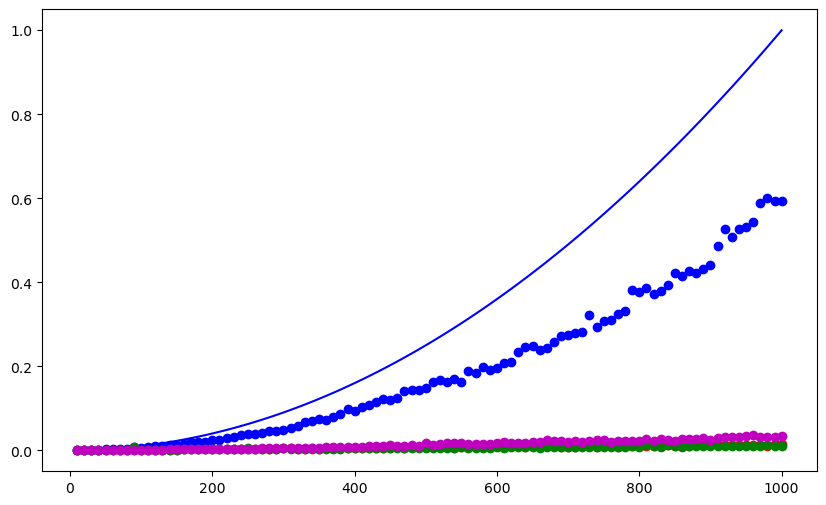

In [10]:
ns = np.linspace(10, 1000, 100, dtype=int)

res_heap = test_quicksort(ns)
res_amlo = test_optimo(ns)
res_optimo = test_malo(ns)
res_mutable = test_mutable(ns)

plt.plot(ns, (ns**2)/1_000_000, '-b')
plt.plot(ns, res_amlo, 'or')
plt.plot(ns, res_optimo, 'ob')
plt.plot(ns, (ns * np.log(ns))/500_000, '-g')
plt.plot(ns, res_heap, 'og')
plt.plot(ns, res_mutable, 'om')

## 2. Comparacion de los algoritmos que tienen una complejidad menor
- Ahora descartamos el complejo con el pivote al final
- Se cogen de 10 a 5000 elementos para difrenciar los comportamientos
- Destaca en magenta el quicksort con pivotaje basado en le medio de 3 valores, que tiende a O(n log n) pero con una cota mayor
- Los puntos rojos se correspnden con el heapsort
- La linea magenta marca la linea de n log n

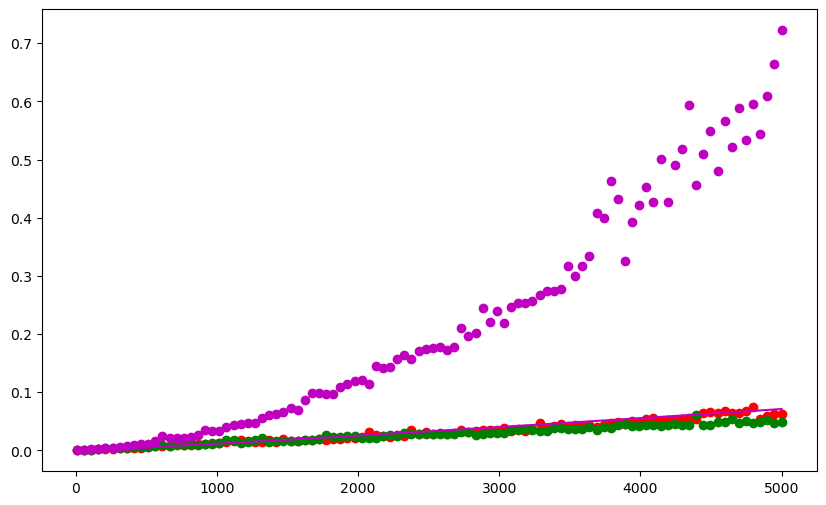

In [11]:
ns = np.linspace(10, 5000, 100, dtype=int)

res_quick = test_quicksort(ns)
res_heap = test_optimo(ns)
res_mutable = test_mutable(ns)

plt.plot(ns, res_heap, 'or')
plt.plot(ns, res_quick, 'og')
plt.plot(ns, res_mutable, 'om')
plt.plot(ns, (ns * np.log(ns))/600_000, '-m')

## 3. comparacion de quicksort con listas separadas com heapsort
- En rojo tenemos los tiempos de heapsort
- En verde se ve quicksort
- Ambos siguen la misma tendencia a pesar que n llega a 10000 elementos
- Podemos concluir que hay una complejidad añadida en acceder a las sublistas del quicksort que muta la lista
- Ganamos velocidad sacrificando uso de memoria

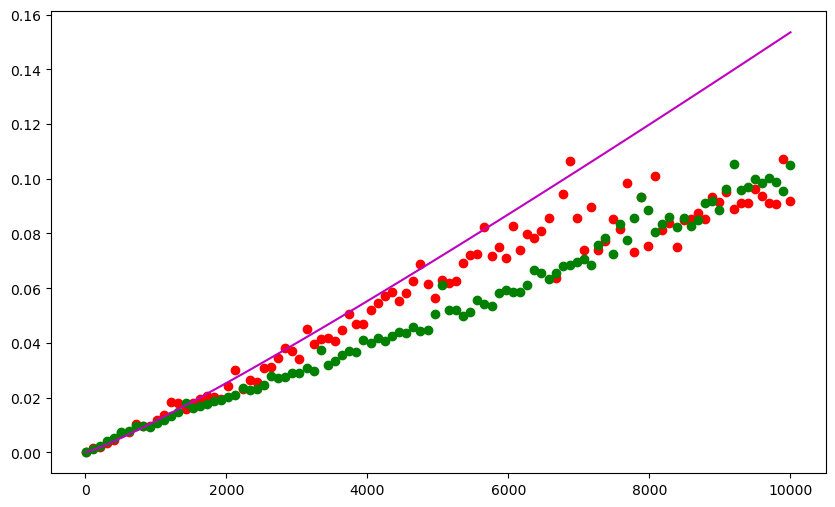

In [12]:
ns = np.linspace(10, 10000, 100, dtype=int)

res_quick = test_quicksort(ns)
res_heap = test_optimo(ns)

plt.plot(ns, res_heap, 'or')
plt.plot(ns, res_quick, 'og')
plt.plot(ns, (ns * np.log(ns))/600_000, '-m')

In [13]:
# Catálogo de sopas, caldos y estofados
s0 = Sopa("Sopa de pollo", 2, 0) # nombre, coste, id
s1 = Sopa("Vichyssoise", 4, 1)
s2 = Sopa("Crema de espárragos", 1.5, 2)
s3 = Sopa("Sopa de cocido", 1.2, 3)
s4 = Sopa("Caldo montañés", 5, 4)
s5 = Sopa("Sopa de langosta", 9, 5)

# registro de ventas
registro_test = [s1, s0, s2, s3, s1, s3, s4, s0, s0, s0, s2, s3 ,s1]
print(registro_test)
key_sort(registro_test, key_function=lambda x:x, reverse=True)
print("---")
print(registro_test)


[Sopa(1)[Vichyssoise@4€], Sopa(0)[Sopa de pollo@2€], Sopa(2)[Crema de espárragos@1.5€], Sopa(3)[Sopa de cocido@1.2€], Sopa(1)[Vichyssoise@4€], Sopa(3)[Sopa de cocido@1.2€], Sopa(4)[Caldo montañés@5€], Sopa(0)[Sopa de pollo@2€], Sopa(0)[Sopa de pollo@2€], Sopa(0)[Sopa de pollo@2€], Sopa(2)[Crema de espárragos@1.5€], Sopa(3)[Sopa de cocido@1.2€], Sopa(1)[Vichyssoise@4€]]
---
[Sopa(4)[Caldo montañés@5€], Sopa(3)[Sopa de cocido@1.2€], Sopa(3)[Sopa de cocido@1.2€], Sopa(3)[Sopa de cocido@1.2€], Sopa(2)[Crema de espárragos@1.5€], Sopa(2)[Crema de espárragos@1.5€], Sopa(1)[Vichyssoise@4€], Sopa(1)[Vichyssoise@4€], Sopa(1)[Vichyssoise@4€], Sopa(0)[Sopa de pollo@2€], Sopa(0)[Sopa de pollo@2€], Sopa(0)[Sopa de pollo@2€], Sopa(0)[Sopa de pollo@2€]]


In [14]:
s0.coste <= s1.coste <= s2.coste

False

In [15]:
#Listas aleatorias ordenadas
lista_test = random.sample(range(1000, 10000), 100)
print(lista_test)

res = key_sort(lista_test, key_function=lambda x: x)
print(res)

[4768, 6959, 9336, 3418, 2906, 4809, 6625, 9894, 7685, 8625, 8454, 6361, 9988, 4003, 7253, 4181, 5432, 6463, 2612, 3460, 9555, 2026, 5557, 7213, 8298, 6731, 7962, 8555, 7834, 5854, 2145, 3561, 4128, 9946, 4007, 4579, 7896, 9743, 6577, 7947, 4643, 3480, 4499, 4926, 2860, 5668, 6093, 4051, 2529, 4315, 8842, 5027, 1447, 4259, 8011, 2947, 9726, 1713, 9501, 9083, 9330, 4895, 4489, 7175, 4009, 1878, 9179, 9520, 5920, 8886, 1053, 6567, 3362, 5445, 2890, 8932, 1904, 6218, 3751, 2086, 7933, 4037, 6331, 4164, 3920, 5103, 4265, 2276, 5807, 7846, 4012, 8751, 7609, 4833, 8875, 9871, 4557, 6009, 8796, 9896]
[1053, 1447, 1713, 1878, 1904, 2026, 2086, 2145, 2276, 2529, 2612, 2860, 2890, 2906, 2947, 3362, 3418, 3460, 3480, 3561, 3751, 3920, 4003, 4007, 4009, 4012, 4037, 4051, 4128, 4164, 4181, 4259, 4265, 4315, 4489, 4499, 4557, 4579, 4643, 4768, 4809, 4833, 4895, 4926, 5027, 5103, 5432, 5445, 5557, 5668, 5807, 5854, 5920, 6009, 6093, 6218, 6331, 6361, 6463, 6567, 6577, 6625, 6731, 6959, 7175, 7213, 72

In [16]:
#testeable
def divide_venceras(seq):
    ocurrencias = {}
    # Implementamos busqueda binaria para mirar el primer y ultimo elemento de 
    # los segmentos
    # Lista global?
    def calc_segmento(seq, inicio, fin):
        if seq[inicio] == seq[fin]:
            return {seq[inicio]: (fin - inicio) + 1}
        else:
            medio = (inicio + fin) // 2
            return Counter(calc_segmento(seq, inicio, medio)) + Counter(calc_segmento(seq, medio+1, fin))
    
    return calc_segmento(seq, 0, len(seq)-1)
    
def fuerza_bruta(seq):
    ocurrencias = {}

    for val in seq:
        if val in ocurrencias:
            ocurrencias[val] = ocurrencias[val] + 1
        else:
            ocurrencias[val] = 1
    return ocurrencias


def calcula_popularidad(registro, method="bruteforce"):
    """Calcula la popularidad de cada tipo de sopa.

    Parameters
    ----------
    registro : sequence
        Secuencia de unidades vendidas de tipo Sopa
    method: String
        Algoritmo a emplear, 'bruteforce' o 'divideandconquer'.

    Returns
    -------
    dict
        Diccionario de tipos únicos de sopa (claves) y unidades
        vedidas de cada tipo (valores). El resultado sólo contiene
        claves para los tipos de sopa con al menos una ud. vendida

    Notes
    -----
    Si se emplea el método "divideandconquer" se asume que registro
    está ordenado por tipo de sopa.

    """
    if len(registro) <= 0:
        return {}

    if method == "bruteforce":
        # Los elementos no estan ordenados
        return fuerza_bruta(registro)
    elif method == "divideandconquer":
        return divide_venceras(registro)


In [17]:
fun = lambda x: x*2
fun(3)

6

### Comparación de tiempos de ejecución
Compara de manera empírica a continuación los tiempos de ejecución de ambas versiones de *calcula_popularidad* sobre registros, ordenados por id, de diferentes tamaños. Añade las celdas que necesites.

Utiliza el modulo *time* (https://docs.python.org/3/library/time.html) o simplemente el comando mágico de Jupyter *%time* (
https://ipython.readthedocs.io/en/stable/interactive/magics.html)

Trata de investigar los siguientes aspectos:
* ¿Cómo crece el tiempo de ejecución en función del tamaño de la entrada?
* ¿Sobre qué tamaño máximo podrías calcular la popularidad de las sopas vendidas en un tiempo razonable, utilizando una versión o la otra?

Recuerda que asumimos que partimos del registro de ventas ordenado por id.

In [47]:
ns = np.linspace(10, 10_000, 200, dtype=int)

def test(ns, tipo="bruteforce"):
# Comparacion de tiempos, de 100 valores a 10e10 con aumoentos de 10
    resultados = []
    for i in ns:
        lista_test = [random.randint(1, 10) for x in range(i)]
        key_sort(lista_test, key_function=lambda x: x)
        test = timeit.Timer(lambda: calcula_popularidad(lista_test, tipo))
        resultados.append(test.timeit(10))
    return resultados




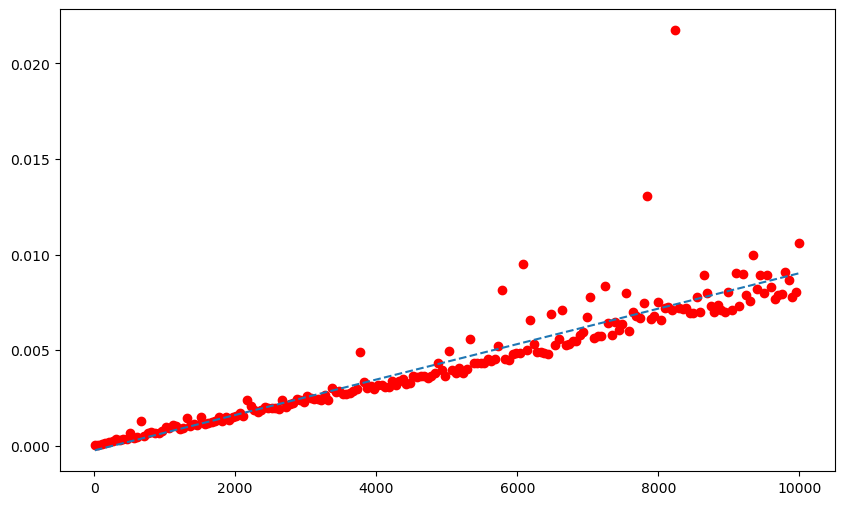

In [48]:
res_bruta = test(ns, tipo="bruteforce")

# Ajuste de datos
coef = np.polyfit(ns, res_bruta, 1)
linea_ajuste = np.poly1d(coef)

plt.plot(ns, res_bruta, 'or')
plt.plot(ns, linea_ajuste(ns), '--')

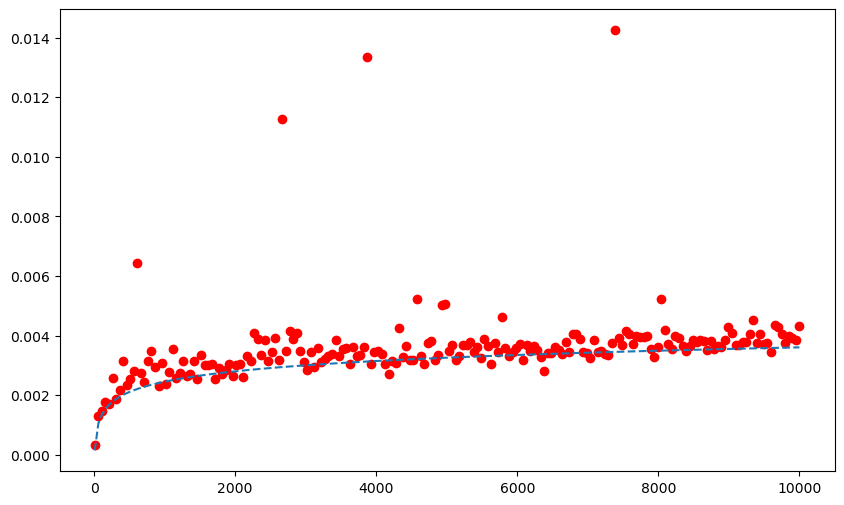

In [55]:
res_dv = test(ns, tipo="divideandconquer")


plt.plot(ns, res_dv, 'or')
plt.plot(ns, (np.log(ns)-2)/2000, '--')

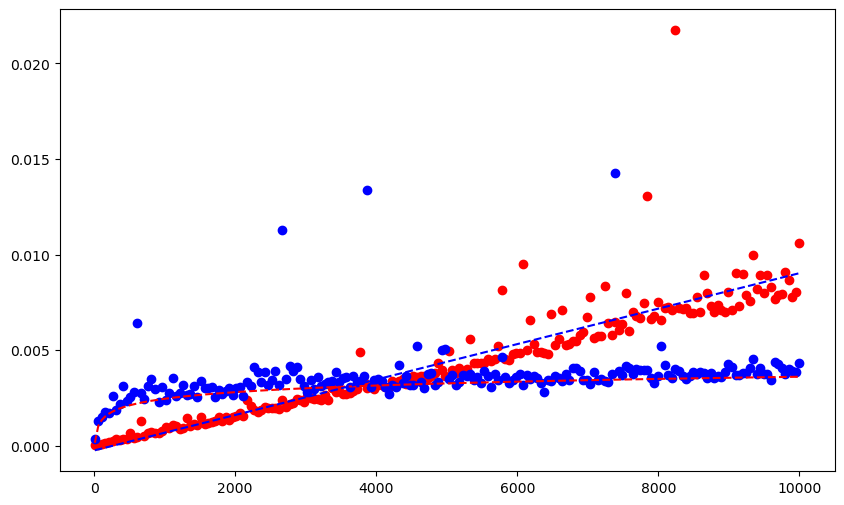

In [58]:
plt.plot(ns, res_bruta, 'or')
plt.plot(ns, res_dv, 'ob')
plt.plot(ns, (np.log(ns)-2)/2000, '--r')
plt.plot(ns, linea_ajuste(ns), '--b')

In [21]:
import unittest,random

# Catálogo de sopas, caldos y estofados
s0 = Sopa("Sopa de pollo", 2, 0) # nombre, coste, id
s1 = Sopa("Vichyssoise", 4, 1)
s2 = Sopa("Crema de espárragos", 1.5, 2)
s3 = Sopa("Sopa de cocido", 1.2, 3)
s4 = Sopa("Caldo montañés", 5, 4)
s5 = Sopa("Sopa de langosta", 9, 5)

# registro de ventas
registro_test = [s1, s0, s2 ,s3, s1, s3, s4, s0, s0, s0]
registro_ordendao = [s0, s0, s0 ,s0, s0, s0, s3, s4, s4, s4]
registro_ordendao = []

# calcula_popularidad(registro_ordendao, method="divideandconquer")
calcula_popularidad(registro_ordendao, method="divideandconquer")

{}

#### Caso de ejemplo

In [22]:
registro_test = [s1, s0, s2, s3, s1, s3, s4, s0, s0, s0]

class TestKeySort(unittest.TestCase):

    def test_basic_sort(self):
        v = list(range(100))
        random.seed = 1234
        random.shuffle(v)
        key_sort(v)
        self.assertEqual(v, list(range(100))) 

    def test_sopas_sort(self):
        v = registro_test.copy()
        key_sort(v) # ordena por el criterio de comparación definido en Sopa(id)
        self.assertEqual(v, list(sorted(registro_test)))
        

        key_sort(v, key_function=lambda x:x.coste, reverse=True)
        #print(list(sorted(registro_test, key=lambda x: x.coste, reverse = True)))

        self.assertEqual(v, list(sorted(registro_test, key=lambda x: x.coste, reverse = True)))

class TestPopularidad(unittest.TestCase):

    def test_popularidad_basico(self):
        self.assertDictEqual (calcula_popularidad(registro_test),
                              {s0: 4, s1: 2, s2: 1, s3: 2, s4: 1})
        self.assertDictEqual (calcula_popularidad(sorted(registro_test), method="divideandconquer"),
                              {s0: 4, s1: 2, s2: 1, s3: 2, s4: 1})
        self.assertDictEqual (calcula_popularidad(sorted(registro_test*2), method="divideandconquer"),
                              {s0: 8, s1: 4, s2: 2, s3: 4, s4: 2})
        self.assertDictEqual (calcula_popularidad([s0]*40+[s1]*50+[s2]*60),
                              {s0: 40, s1: 50, s2: 60})  
        self.assertDictEqual (calcula_popularidad([s0]*40+[s1]*50+[s2]*60, method="divideandconquer"),
                              {s0: 40, s1: 50, s2: 60})       

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    

...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


##### **Tests**

Para probar que tu solución pasa los tests. Utilice el comando:

```bash
$ python tests-py3<version de python> <mi notebook>
```

Los tests necesitan de la librería `nbformat`

```bash
$ pip install nbformat
```

###### Explicación de los tests
* `test_basic_sort`, `test_sopas_sort` y `test_popularidad_basico`: Son los mismos que los casos de ejemplo.
* `test_key_sort`: Comprueba el algoritmo de ordenación con diferentes funciones clave.
* `test_popularidad_limite`: Comprueba varios casos límite de la función `calcula_popularidad` tanto para fuerza bruta como para divide y vencerás.
* `test_popularidad_combinaciones`: Comprueba varias combinaciones de cantidades de sopa, tanto para fuerza bruta como para divide y vencerás.
* `test_popularidad_perform`: Comprueba el rendimiento de la función `calcula_popularidad` para divide y vencerás. El tiempo de ejecución debería ser en torno a 1 segundo.

---

### **Informe**
Contesta a las siguientes preguntas.


#### **Análisis de la complejidad**

1. Método `key_sort`
    * **Complejidad temporal**: Quicksort es un metodo divide y venceras, pero es insetable por lo que dependiendo de la situacion pude variar entre O(n^2) y O(nlogn), pero como se ha implementado un metodo para obtener un pivote mejor seleccionando el intemedio de 3, por lo que se tiende a O(nlogn) como se puede ver en las visualizaciones.
    * **Complejidad espacial**: En un quicksort como el mutable la complejidad es O(n) porque se modifica la lista original, sin embargo en la version mas rapida se usan listas extra para almacenar los valores menores mayores e iguales al pivote por lo que si con cada paso en la recursividad estamos creando una sublista que es la mitad de la anterior la complejidad sera de O(nlogn)
2. Método `calcular_popularidad`. Asume que el número de sopas distintas es siempre menor que una constante.
    * **Complejidad temporal**: El metodo de fuerza bruta recorre todos los elementos y los inserta en un diccionario por lo que O(n) para recorrer los elementos, por la complejidad de buscar cada elemento O(log valores_diferentes), que se desprecia, nos quedamos con O(n). El metodo de divide y venceras recorre la lista depenediendo de el numero de valores distintos que haya, en la mayoria de casos los valores se van a repetir en numerosas ocasiones como demuestra la visualizacion que muestra que la popularidad se calcula en O(log n)
    * **Complejidad espacial**: La complejidad sera igual al numero de valores diferentes en la lista, en el peor caso todos son distintos, por lo que seria O(n)

#### **Ordenar registro de unidades vendidas**

* ¿Como afecta la funcion clave, que proporciona el criterio de ordenacion, a la complejidad temporal del algoritmo?

Depende la complejidad des esta, normalmente se usa para seleccionar el parametro del objeto a comparar, por lo que la complejidad sera de O(1) y no afectara a la complejidad del algoritmo, sin embargo, si la funcion realizase alguna operacion con una complejidad no constante, la complejidad del algoritmo seria multiplicada por la de la funcion, ya que se va a ejecutar en cada paso del algoritmo.

* ¿Qué estrategia crees que emplea CUCHARA para devolver el registro ordenado en O(1)?

La lista se ordena segun se insertan los elmentos, por lo que no hay que ordenarla cuando se devuelve sino que ya estaba almacenada asi y no se toca, sino tendira que hacer magia para poder ordenar listas en tiempo constante

#### **Calcular popularidad de las sopas**

* ¿Has conseguido mejorar la complejidad temporal mediante la solucion Divide y Venceras? ¿Por que ha mejorado? ¿Cuanto ha mejorado? Pon algunos ejemplos numericos especulativos que relacionen el tamano del problema con el tiempo de ejecucion en ambas versiones. Contrástalos de forma empírica empleando para ello tu implementación.

La complejidad ha pasado de O(n) a O(log n) ha mejorado enormemente sobretodo para n grandes. Ha mejorado porque al usar divide y venceras se puede aplicar una busqueda binaria que acota los intervalos de numeros iguales, se han comparado en la visualizacion. Es importante tener en cuenta que los timepos de divide y venceras son menores que fuerza bruta siempre que el numero de valores distintos es varias veces menor que el total de valores, por debajo de 4000 valores es mejora fuerza bruta, y esto es con numeros de 0 al 10.

* Al emplear la versión 'divideandconquer' se asume que la entrada está ordenada por tipo de sopa. Si no es así, la salida de la popularidad de los platos será arbitraria, posiblemente incorrecta. ¿Sería razonable implementar alguna medida para detectar si la entrada no está ordenada?

Se podria usar un sistema simiar para comprobar si una lista esta ordenando, por ejempo tomando n valores aleatorios para estimar si la lista esta ordenada para comrobarlo de forma inexacta en O(1) o recorrer todos lo elementos en O(n) para comprobarlo. Lo ideal sera controlar de donde se obtiene la lista y que funcion key se ha usado para evitar revisar la lista.